# scikit-learn 
- Classification
    - Supervised learning : 정답이 있는 결과를 맞출 때 > Classification, Regression
    - UnSupervised learning : 정답이 없는 결과를 맞출 때 > Clustering 등
- Regression


- 사이킷 런이란 ?
    - 사이킷런은 대표적인 파이썬 머신러닝 라이브러리
    - 머신러닝 알고리즘은 조리도구와 같다 알고리즘을 통해서 데이터를 요리한다고 보면 된다.

- 머신러닝 문제
    - 크게는 정답이 있는 문제인 Supervised learning(지도학습)과 Clustering(클러스터링), Dimensionality reduction(차원 축소)  
    같은 문제를 해결하는 Unsupervised learning(비지도 학습)으로 나뉜다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [11]:
# 데이터 준비


In [13]:
df = pd.read_csv('project.csv',encoding='Windows-1252', delimiter=';')

In [14]:
df.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,48,23,23.1,3.1,7.3,...,0.579,2.2,4.7,6.9,1.1,0.5,0.6,1.0,2.0,7.5
1,2,Steven Adams,C,28,MEM,56,55,26.1,2.8,5.0,...,0.556,4.5,5.1,9.6,3.2,0.9,0.7,1.6,1.9,7.0
2,3,Bam Adebayo,C,24,MIA,33,33,33.0,7.2,13.6,...,0.764,2.8,7.4,10.2,3.5,1.5,0.6,2.9,3.2,18.7
3,4,Santi Aldama,PF,21,MEM,27,0,10.3,1.4,3.6,...,0.600,0.9,1.5,2.4,0.5,0.1,0.3,0.3,1.0,3.3
4,5,LaMarcus Aldridge,C,36,BRK,38,11,22.8,5.8,10.5,...,0.844,1.6,4.2,5.8,0.8,0.3,1.1,1.0,1.7,13.7
5,6,Nickeil Alexander-Walker,SG,23,TOT,52,19,25.4,4.6,12.2,...,0.722,0.7,2.5,3.2,2.7,0.8,0.4,1.6,1.7,12.3
6,6,Nickeil Alexander-Walker,SG,23,NOP,50,19,26.3,4.7,12.6,...,0.722,0.7,2.6,3.3,2.8,0.8,0.4,1.7,1.8,12.8
7,6,Nickeil Alexander-Walker,SG,23,UTA,2,0,2.5,0.0,0.5,...,0.000,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0
8,7,Grayson Allen,SG,26,MIL,49,48,28.0,4.0,9.4,...,0.857,0.5,2.9,3.4,1.5,0.8,0.3,0.6,1.4,11.5
9,8,Jarrett Allen,C,23,CLE,50,50,32.6,6.6,9.9,...,0.702,3.6,7.4,11.0,1.8,0.7,1.3,1.8,1.8,16.2


In [17]:
df.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,...,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,297.846049,26.044959,28.279292,12.915531,18.114169,2.855586,6.401907,0.420251,0.868801,2.572071,...,0.633832,0.810899,2.540736,3.349455,1.775749,0.576158,0.361717,0.979428,1.539782,7.727520
std,169.542662,4.092637,19.514704,18.423425,9.995226,2.288435,4.781059,0.161695,0.879551,2.292469,...,0.305932,0.760459,1.870797,2.438201,1.841861,0.447355,0.392693,0.834717,0.844562,6.265428
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.250000,23.000000,6.250000,0.000000,9.725000,1.100000,2.800000,0.375000,0.100000,0.700000,...,0.563000,0.300000,1.225000,1.600000,0.500000,0.300000,0.100000,0.400000,1.000000,3.000000
50%,290.500000,25.000000,31.000000,3.000000,17.000000,2.400000,5.100000,0.436000,0.600000,2.000000,...,0.748000,0.600000,2.300000,2.950000,1.100000,0.500000,0.300000,0.800000,1.600000,6.300000
75%,450.000000,29.000000,46.000000,20.000000,26.475000,4.000000,8.900000,0.497250,1.400000,3.900000,...,0.833000,1.100000,3.400000,4.500000,2.300000,0.800000,0.500000,1.300000,2.200000,10.675000
max,592.000000,41.000000,60.000000,60.000000,39.000000,11.000000,21.400000,1.000000,4.600000,12.300000,...,1.000000,4.500000,11.300000,14.800000,11.000000,2.300000,3.000000,4.800000,4.000000,29.400000


In [18]:
df.info

<bound method DataFrame.info of       Rk             Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...  \
0      1   Precious Achiuwa   C   22  TOR  48  23  23.1  3.1   7.3  ...   
1      2       Steven Adams   C   28  MEM  56  55  26.1  2.8   5.0  ...   
2      3        Bam Adebayo   C   24  MIA  33  33  33.0  7.2  13.6  ...   
3      4       Santi Aldama  PF   21  MEM  27   0  10.3  1.4   3.6  ...   
4      5  LaMarcus Aldridge   C   36  BRK  38  11  22.8  5.8  10.5  ...   
..   ...                ...  ..  ...  ...  ..  ..   ...  ...   ...  ...   
729  588     Thaddeus Young  PF   33  TOR   2   0  16.5  3.5   7.0  ...   
730  589         Trae Young  PG   23  ATL  53  53  34.4  9.3  20.5  ...   
731  590     Omer Yurtseven   C   23  MIA  41  10  14.1  2.6   4.9  ...   
732  591        Cody Zeller   C   29  POR  27   0  13.1  1.9   3.3  ...   
733  592        Ivica Zubac   C   24  LAC  54  54  24.3  3.7   5.7  ...   

       FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0    0.

In [19]:
df.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

In [20]:
df.isna().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [22]:
ageTimeDf = df[[
    'Player','Age', 'MP'
]]
ageTimeDf.head(10)

,Player,Age,MP
0,Precious Achiuwa,22,23.1
1,Steven Adams,28,26.1
2,Bam Adebayo,24,33.0
3,Santi Aldama,21,10.3
4,LaMarcus Aldridge,36,22.8
5,Nickeil Alexander-Walker,23,25.4
6,Nickeil Alexander-Walker,23,26.3
7,Nickeil Alexander-Walker,23,2.5
8,Grayson Allen,26,28.0
9,Jarrett Allen,23,32.6


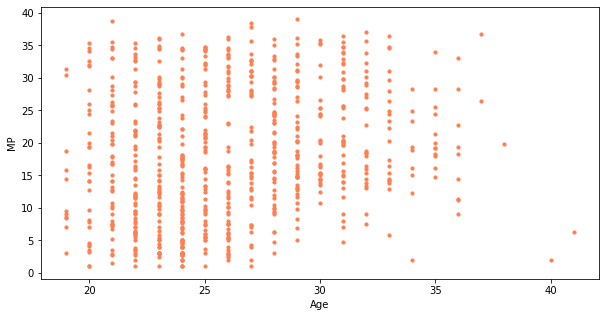

In [23]:
ageTimeDf.plot(kind = 
              'scatter',
              x = 'Age',
              y = 'MP',
              c = 'coral',
              s = 10,
              figsize = (10,5))
plt.show()
plt.close()

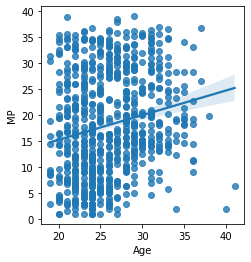

In [25]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(1,2,1)

sns.regplot(x = 'Age', y='MP', data = ageTimeDf ,ax = ax1)
plt.show()
plt.close()

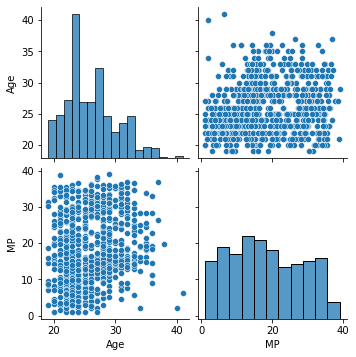

In [27]:
sns.pairplot(ageTimeDf)
plt.show()
plt.close()

In [28]:
ageTimeDf.corr()

,Age,MP
Age,1.00000,0.19437
MP,0.19437,1.00000


In [29]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,48,23,23.1,3.1,7.3,...,0.579,2.2,4.7,6.9,1.1,0.5,0.6,1.0,2.0,7.5
1,2,Steven Adams,C,28,MEM,56,55,26.1,2.8,5.0,...,0.556,4.5,5.1,9.6,3.2,0.9,0.7,1.6,1.9,7.0
2,3,Bam Adebayo,C,24,MIA,33,33,33.0,7.2,13.6,...,0.764,2.8,7.4,10.2,3.5,1.5,0.6,2.9,3.2,18.7
3,4,Santi Aldama,PF,21,MEM,27,0,10.3,1.4,3.6,...,0.600,0.9,1.5,2.4,0.5,0.1,0.3,0.3,1.0,3.3
4,5,LaMarcus Aldridge,C,36,BRK,38,11,22.8,5.8,10.5,...,0.844,1.6,4.2,5.8,0.8,0.3,1.1,1.0,1.7,13.7


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      734 non-null    int64  
 1   Player  734 non-null    object 
 2   Pos     734 non-null    object 
 3   Age     734 non-null    int64  
 4   Tm      734 non-null    object 
 5   G       734 non-null    int64  
 6   GS      734 non-null    int64  
 7   MP      734 non-null    float64
 8   FG      734 non-null    float64
 9   FGA     734 non-null    float64
 10  FG%     734 non-null    float64
 11  3P      734 non-null    float64
 12  3PA     734 non-null    float64
 13  3P%     734 non-null    float64
 14  2P      734 non-null    float64
 15  2PA     734 non-null    float64
 16  2P%     734 non-null    float64
 17  eFG%    734 non-null    float64
 18  FT      734 non-null    float64
 19  FTA     734 non-null    float64
 20  FT%     734 non-null    float64
 21  ORB     734 non-null    float64
 22  DR

In [33]:
an_columns = ['Age','G','GS', 'MP','FG%','3P%', '2P%', 'eFG%', 'FT%' ]
corr_mat = np.corrcoef(df[an_columns].values.T)
corr_mat

array([[1.        , 0.0560584 , 0.07305767, 0.19437014, 0.08772902,
        0.1290058 , 0.07314254, 0.11300643, 0.05421586],
       [0.0560584 , 1.        , 0.66508099, 0.63356263, 0.29161645,
        0.34220241, 0.26825626, 0.33175871, 0.53959939],
       [0.07305767, 0.66508099, 1.        , 0.76419662, 0.21758569,
        0.20045877, 0.18187735, 0.22736441, 0.31975903],
       [0.19437014, 0.63356263, 0.76419662, 1.        , 0.30644779,
        0.36206845, 0.27981333, 0.35516345, 0.49346271],
       [0.08772902, 0.29161645, 0.21758569, 0.30644779, 1.        ,
        0.27767873, 0.82875118, 0.95830514, 0.25195832],
       [0.1290058 , 0.34220241, 0.20045877, 0.36206845, 0.27767873,
        1.        , 0.13630117, 0.45714568, 0.35540993],
       [0.07314254, 0.26825626, 0.18187735, 0.27981333, 0.82875118,
        0.13630117, 1.        , 0.77932686, 0.28005422],
       [0.11300643, 0.33175871, 0.22736441, 0.35516345, 0.95830514,
        0.45714568, 0.77932686, 1.        , 0.3100259 ],


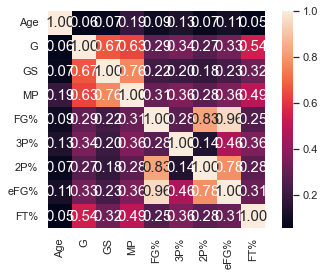

In [34]:
sns.set()
full_mat = sns.heatmap(corr_mat, cbar=True, annot=True, square=True,fmt='.2f',
                      annot_kws = {'size':15}, yticklabels = an_columns,
                      xticklabels = an_columns)
plt.show()
plt.close()